### Imports 

In [30]:
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np

# for downprojection through KDA:
# ! pip install pyDML
import dml

import glob
import os

### Load signal

In [17]:
label_dict = {'left_hand': 1, 'right_hand': 2, 'left_pocket': 3, 'right_pocket': 4}

In [18]:
def simple_visualizer(zyx_signal, position_second_one):
    plt.title('whole signal')
    plt.plot(zyx_signal)
    plt.show()
    
    plt.title('first three seconds of signal')
    plt.plot(zyx_signal[:position_second_one*3+1,:])
    plt.show()
    
    plt.title('first six seconds of signal')
    plt.plot(zyx_signal[:position_second_one*3*2+1,:])
    plt.show()
    
    return

## Pre-process signal

### Filter signal: butterworth

In [19]:
def butter_filtering(zyx_signal):
    
    butterworth = scipy.signal.butter(N=5, Wn=9, btype='low', analog=False, output='sos', fs=20)

    # for z-axis:
    filtered_signal_z = scipy.signal.sosfilt(butterworth, zyx_signal[:,0])
    # for y-axis:
    filtered_signal_y = scipy.signal.sosfilt(butterworth, zyx_signal[:,1])
    # for x-axis:
    filtered_signal_x = scipy.signal.sosfilt(butterworth, zyx_signal[:,2])

    plt.title('before and after filtering z')
    plt.plot(zyx_signal[:,0],label='original signal')
    plt.plot(filtered_signal_z,label='filtered signal')
    plt.legend()
    plt.show()

    plt.title('before and after filtering y')
    plt.plot(zyx_signal[:,1],label='original signal')
    plt.plot(filtered_signal_y,label='filtered signal')
    plt.legend()
    plt.show()

    plt.title('before and after filtering x')
    plt.plot(zyx_signal[:,2],label='original signal')
    plt.plot(filtered_signal_x,label='filtered signal')
    plt.legend()
    plt.show()    
    
    return filtered_signal_z, filtered_signal_y, filtered_signal_x

## Extract features
Extract the features within the window!

### Time domain

In [20]:
def zcr(window):
    
    switch = np.sign(window[:-1])+np.sign(window[1:])
    number_switches = len(np.where(switch==0)[0])
    zcr = number_switches/(len(window)-1)
    
    return zcr

In [21]:
def time_feat_finder(filtered_signal_z, filtered_signal_y, filtered_signal_x, position_second_one):
    ''' put in whole filtered signal carrying one label '''
    
    multiplier = position_second_one * 3

    max_z = np.zeros((1,len(filtered_signal_z)//multiplier)) # one entry represents one window/sample
    max_y = np.zeros((1,len(filtered_signal_y)//multiplier))
    max_x = np.zeros((1,len(filtered_signal_x)//multiplier))

    min_z = np.zeros((1,len(filtered_signal_z)//multiplier))
    min_y = np.zeros((1,len(filtered_signal_y)//multiplier))
    min_x = np.zeros((1,len(filtered_signal_x)//multiplier))

    sum_z = np.zeros((1,len(filtered_signal_z)//multiplier))
    sum_y = np.zeros((1,len(filtered_signal_y)//multiplier))
    sum_x = np.zeros((1,len(filtered_signal_x)//multiplier))

    abssum_z = np.zeros((1,len(filtered_signal_z)//multiplier))
    abssum_y = np.zeros((1,len(filtered_signal_y)//multiplier))
    abssum_x = np.zeros((1,len(filtered_signal_x)//multiplier))

    std_z = np.zeros((1,len(filtered_signal_z)//multiplier))
    std_y = np.zeros((1,len(filtered_signal_y)//multiplier))
    std_x = np.zeros((1,len(filtered_signal_x)//multiplier))
    
    euc_z = np.zeros((1,len(filtered_signal_z)//multiplier))
    euc_y = np.zeros((1,len(filtered_signal_y)//multiplier))
    euc_x = np.zeros((1,len(filtered_signal_x)//multiplier))

    zcr_z = np.zeros((1,len(filtered_signal_z)//multiplier))
    zcr_y = np.zeros((1,len(filtered_signal_y)//multiplier))
    zcr_x = np.zeros((1,len(filtered_signal_x)//multiplier))

    mean_z = np.zeros((1,len(filtered_signal_z)//multiplier))
    mean_y = np.zeros((1,len(filtered_signal_y)//multiplier))
    mean_x = np.zeros((1,len(filtered_signal_x)//multiplier))

    absmean_z = np.zeros((1,len(filtered_signal_z)//multiplier))
    absmean_y = np.zeros((1,len(filtered_signal_y)//multiplier))
    absmean_x = np.zeros((1,len(filtered_signal_x)//multiplier))

    skew_z = np.zeros((1,len(filtered_signal_z)//multiplier))
    skew_y = np.zeros((1,len(filtered_signal_y)//multiplier))
    skew_x = np.zeros((1,len(filtered_signal_x)//multiplier))

    kurt_z = np.zeros((1,len(filtered_signal_z)//multiplier))
    kurt_y = np.zeros((1,len(filtered_signal_y)//multiplier))
    kurt_x = np.zeros((1,len(filtered_signal_x)//multiplier))

    mag_mean = np.zeros((1,len(filtered_signal_z)//multiplier))
    mag_var = np.zeros((1,len(filtered_signal_z)//multiplier))


    #for ind,(y,x,z) in enumerate(zip(my_segment_ind_y,my_segment_ind_x,my_segment_ind_z)):
    start_ind = -1
    round_ind = 0

    while multiplier < len(zyx_signal) - 1:


        # create windows:
        win_z = filtered_signal_z[start_ind+1:multiplier+1]
        win_y = filtered_signal_y[start_ind+1:multiplier+1]
        win_x = filtered_signal_x[start_ind+1:multiplier+1]

        # extract features:
        max_z[0, round_ind] = max(win_z)
        max_y[0, round_ind] = max(win_y)
        max_x[0, round_ind] = max(win_x)

        min_z[0, round_ind] = min(win_z)
        min_y[0, round_ind] = min(win_y)
        min_x[0, round_ind] = min(win_x)

        sum_z[0, round_ind] = sum(win_z)
        sum_y[0, round_ind] = sum(win_y)
        sum_x[0, round_ind] = sum(win_x)

        abssum_z[0, round_ind] = sum(abs(win_z))
        abssum_y[0, round_ind] = sum(abs(win_y))
        abssum_x[0, round_ind] = sum(abs(win_x))

        std_z[0, round_ind] = np.std(win_z)
        std_y[0, round_ind] = np.std(win_y)
        std_x[0, round_ind] = np.std(win_x)

        euc_z[0, round_ind] = np.sqrt(np.sum(win_z**2))
        euc_y[0, round_ind] = np.sqrt(np.sum(win_y**2))
        euc_x[0, round_ind] = np.sqrt(np.sum(win_x**2))

        zcr_z[0, round_ind] = zcr(win_z)
        zcr_y[0, round_ind] = zcr(win_y)
        zcr_x[0, round_ind] = zcr(win_x)

        mean_z[0, round_ind] = np.mean(win_z)
        mean_y[0, round_ind] = np.mean(win_y)
        mean_x[0, round_ind] = np.mean(win_x)

        absmean_z[0, round_ind] = np.mean(abs(win_z))
        absmean_y[0, round_ind] = np.mean(abs(win_y))
        absmean_x[0, round_ind] = np.mean(abs(win_x))

        skew_z[0, round_ind] = scipy.stats.skew(win_z)
        skew_y[0, round_ind] = scipy.stats.skew(win_y)
        skew_x[0, round_ind] = scipy.stats.skew(win_x)

        kurt_z[0, round_ind] = scipy.stats.kurtosis(win_z)
        kurt_y[0, round_ind] = scipy.stats.kurtosis(win_y)
        kurt_x[0, round_ind] = scipy.stats.kurtosis(win_x) 

        mag = np.sqrt(win_z**2 + win_y**2 + win_x**2)
        mag_mean[0, round_ind]  = np.mean(mag)
        mag_var[0, round_ind]  = np.mean((mag - mag_mean[0, round_ind])**2)


        start_ind = multiplier
        multiplier += position_second_one * 3
        round_ind += 1

    return max_z, max_y, max_x, min_z, min_y, min_x, sum_z, sum_y, sum_x, abssum_z, abssum_y, abssum_x, std_z, std_y, std_x, euc_z, euc_y, euc_x, zcr_z, zcr_y, zcr_x, mean_z, mean_y, mean_x, absmean_z, absmean_y, absmean_x, skew_z, skew_y, skew_x, kurt_z, kurt_y, kurt_x, mag_mean, mag_var

In [22]:
def namevar(obj, namespace):

    try:
        return [name for name in namespace if namespace[name] is obj][0], True
    except: 
        return obj, False

In [27]:
def arff_saver(label, *kwargs):#max_z, max_y, max_x, min_z, min_y, min_x, sum_z, sum_y, sum_x, abssum_z, abssum_y, abssum_x, std_z, std_y, std_x, euc_z, euc_y, euc_x, zcr_z, zcr_y, zcr_x, mean_z, mean_y, mean_x, absmean_z, absmean_y, absmean_x, skew_z, skew_y, skew_x, kurt_z, kurt_y, kurt_x, mag_mean, mag_var):
    ''' append arff by one sample '''
    arff_name = f'feat_arff/all_feat_reduced_label{kwargs[-1]}.arff' 
    
    if not os.path.exists(arff_name):
        no_success_counter = 0
        no_success_list = ['KDA_z[0]','KDA_z[1]','KDA_z[2]','KDA_y[0]','KDA_y[1]','KDA_y[2]','KDA_x[0]','KDA_x[1]','KDA_x[2]']
        with open(arff_name, 'w') as f:
            
            f.write(('@relation firstset\n'))
            
            for feat in kwargs:
                
                a, success = namevar(feat,globals())
                
                if success and a != 'label':
                    
                    f.write((f'@attribute {a} real\n'))
                    
                elif not success and a != 'label':
                    
                    f.write((f'@attribute {no_success_list[no_success_counter]} real\n'))
                    no_success_counter += 1
                    
            f.write(('@attribute label {1,2,3,4}\n\n'))
            f.write('@data\n')
            

    with open(arff_name, 'a') as g:
        g.write(f'1, ')

        for ind, feat in enumerate(kwargs):

            if ind == len(kwargs) - 1:
                g.write(f'{feat}\n')

            else:
                g.write(f'{feat}, ')
            
     
    return

### Dimensionality reduction: KDA (dimensionality = number classes - 1)
For each window of each dimension make a KDA.
For time domain.

In [24]:
max_length_signal = 0
p_sec = 0

for file in glob.glob('raw_data/*/*/Accelerometer.csv'):
    label_name = file.split('/')[-3]
    label = label_dict[label_name]
    
    zyx_pd = pd.read_csv(file, header=0)
    
    position_second_one = np.where(zyx_pd['seconds_elapsed'].to_numpy()>=1)[0][0]
    
    # Cut away the first and last five seconds of a signal:
    zyx_pd_cut = zyx_pd[position_second_one*5:(len(zyx_pd['z'].values)-position_second_one*5)]
    length_signal = zyx_pd_cut.shape[0]
    
    if length_signal > max_length_signal:
        max_length_signal = length_signal
        p_sec = position_second_one
        
max_length_signal

19264

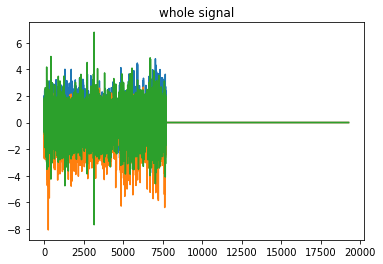

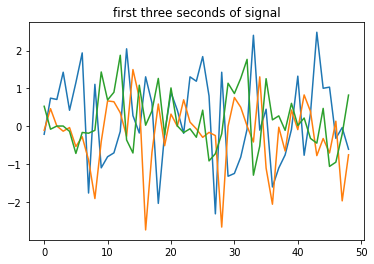

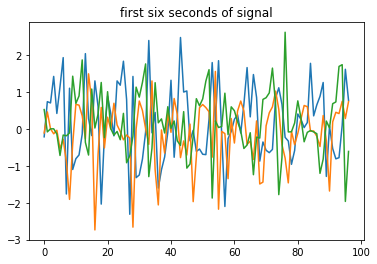

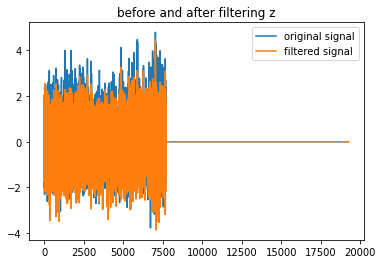

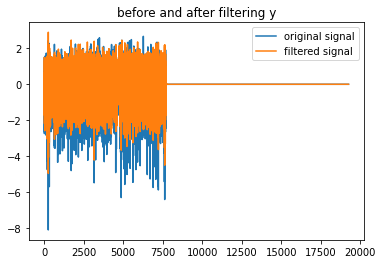

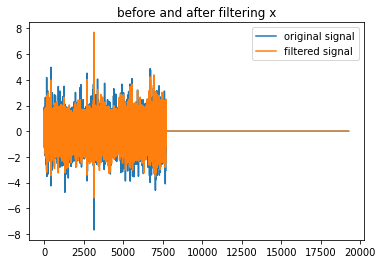

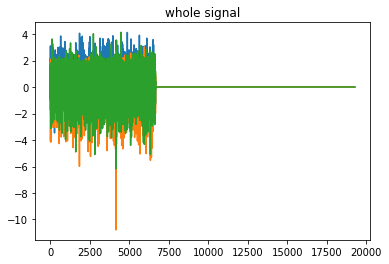

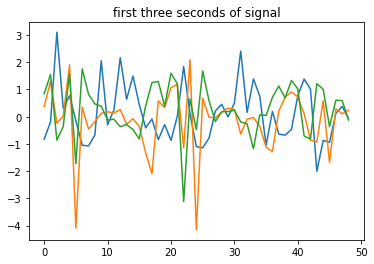

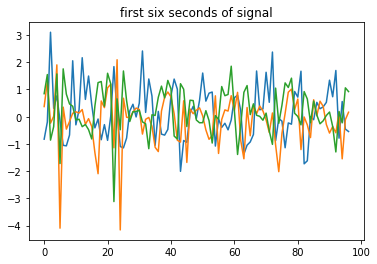

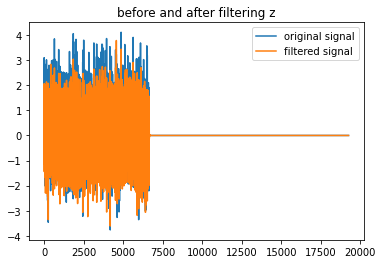

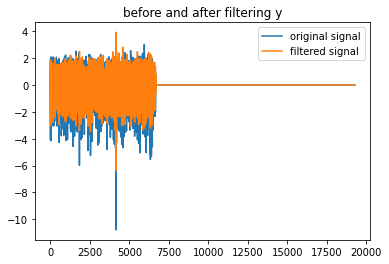

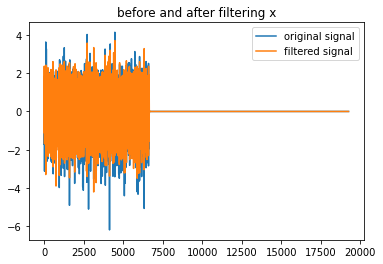

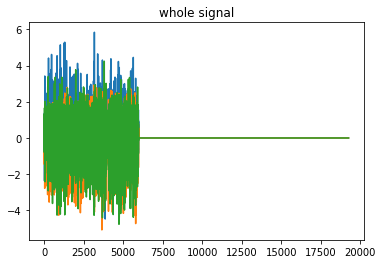

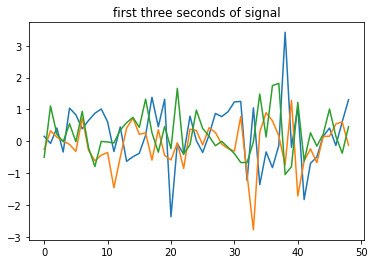

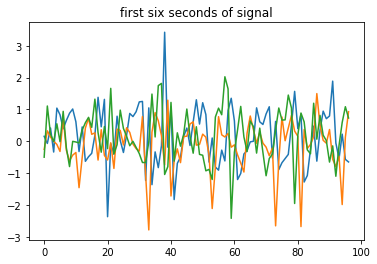

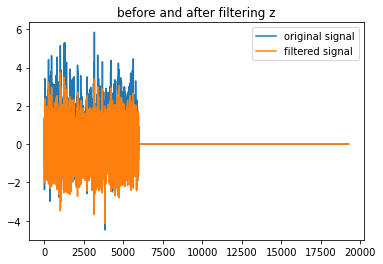

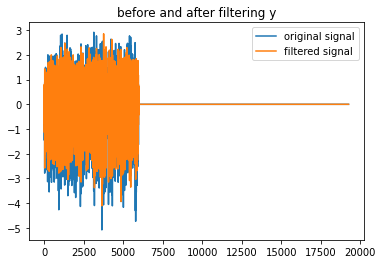

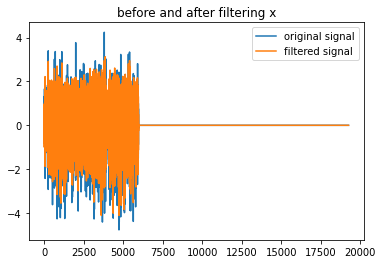

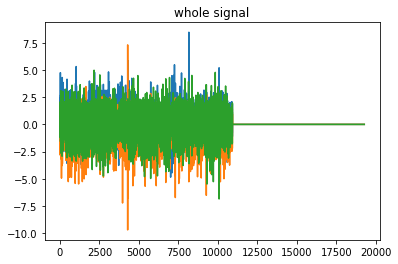

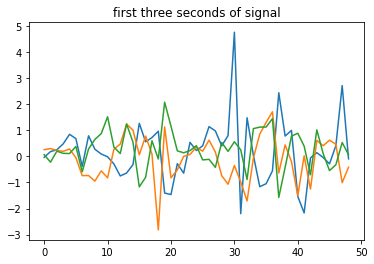

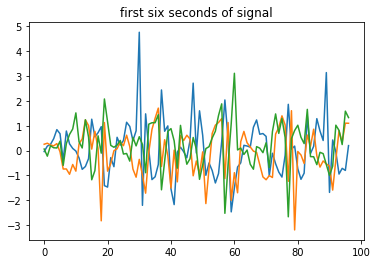

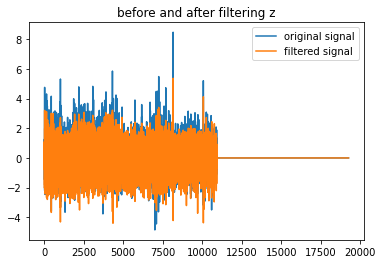

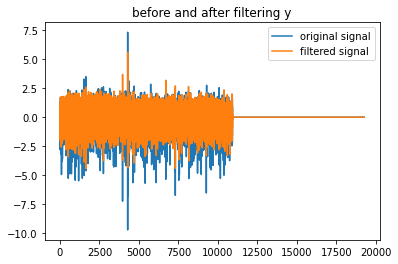

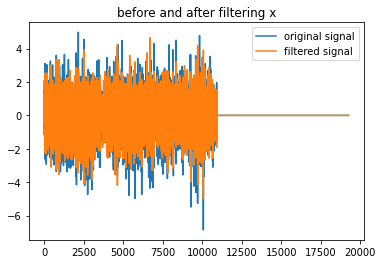

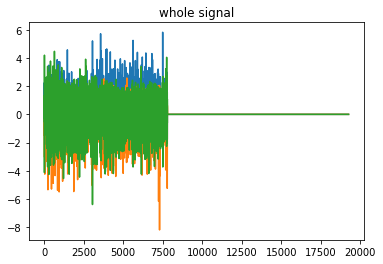

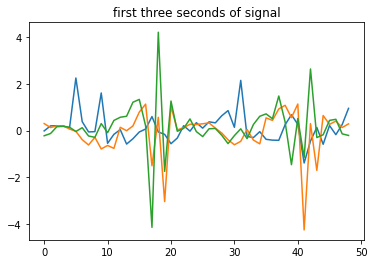

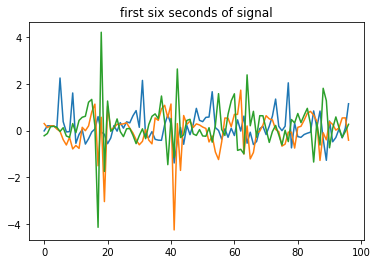

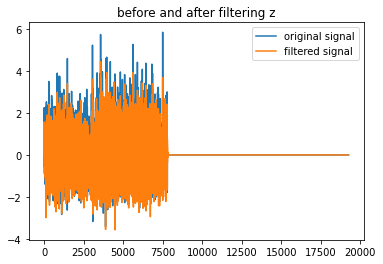

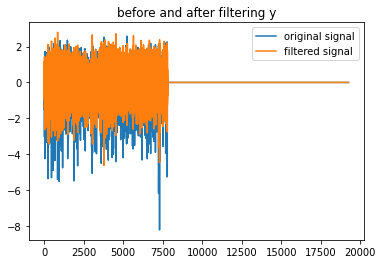

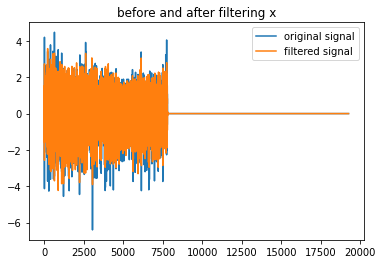

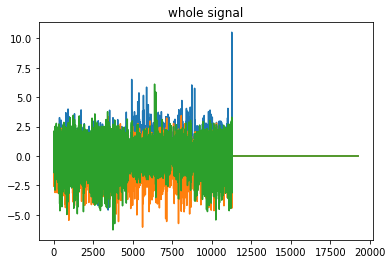

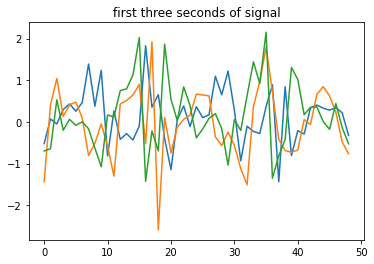

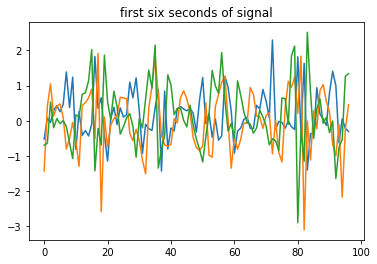

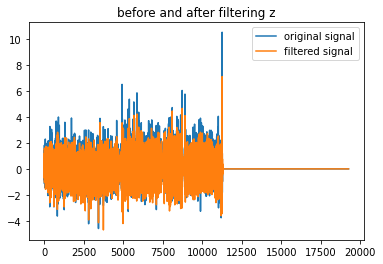

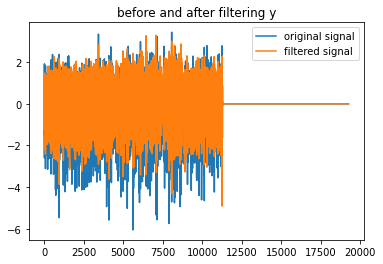

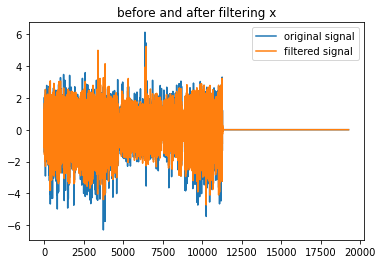

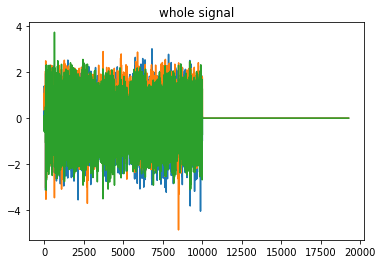

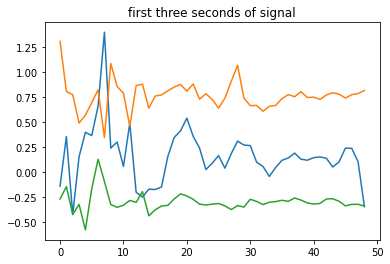

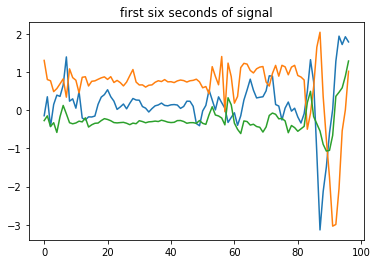

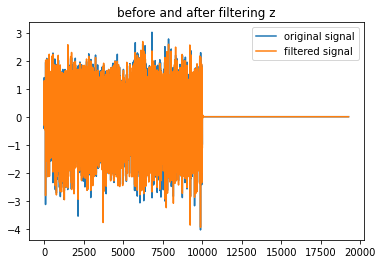

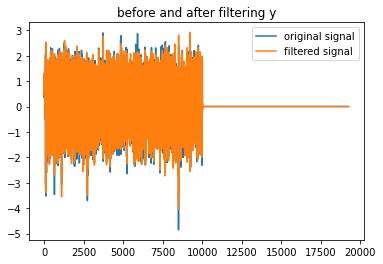

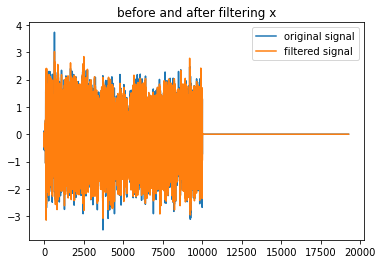

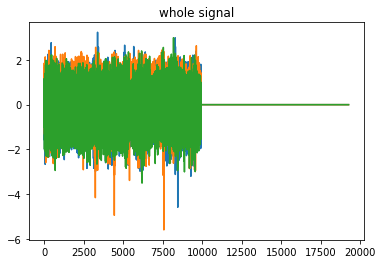

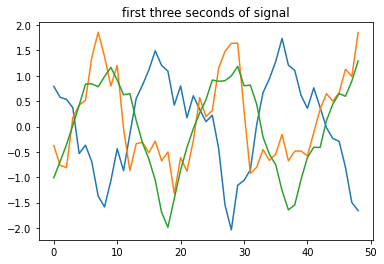

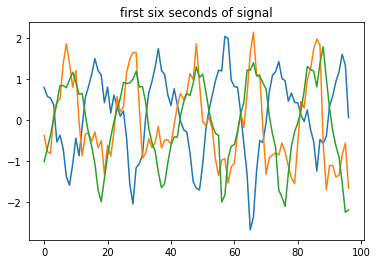

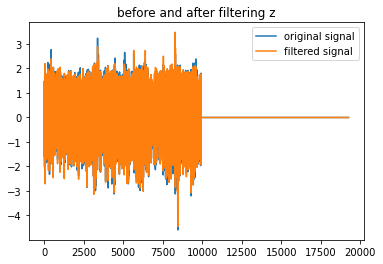

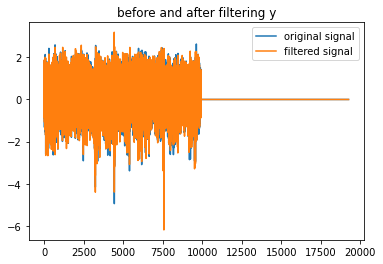

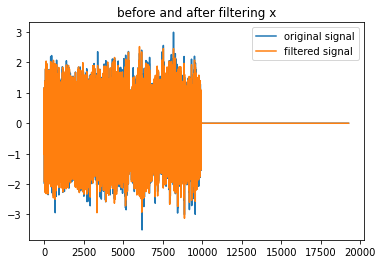

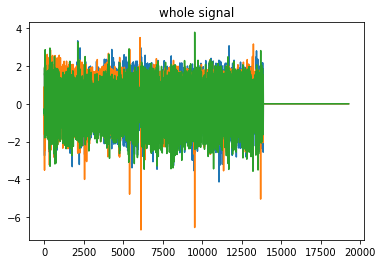

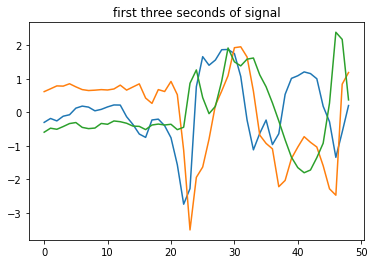

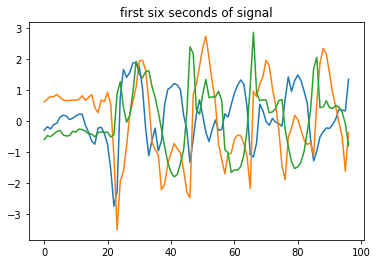

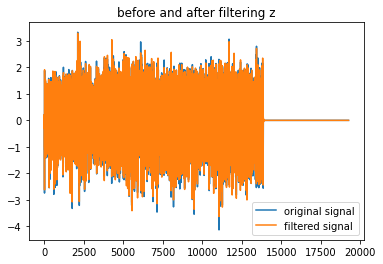

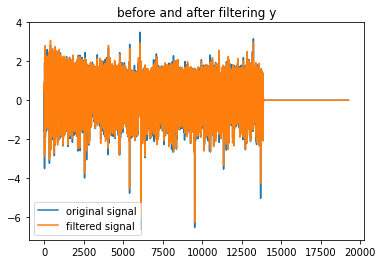

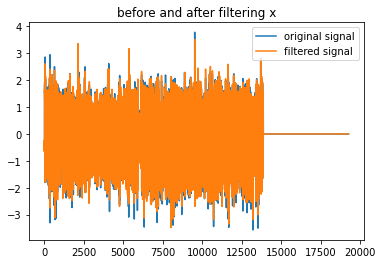

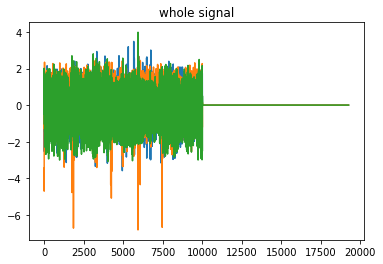

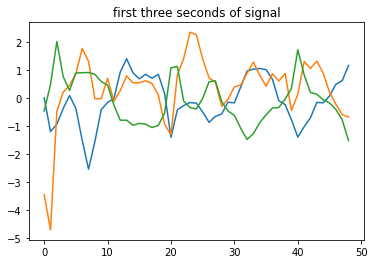

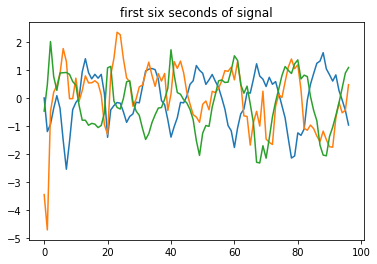

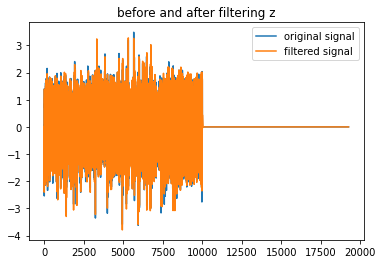

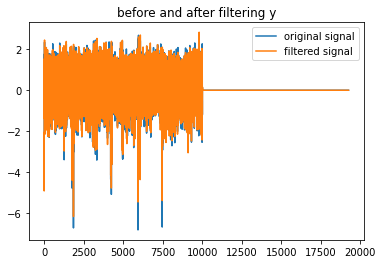

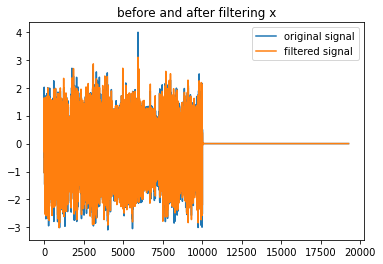

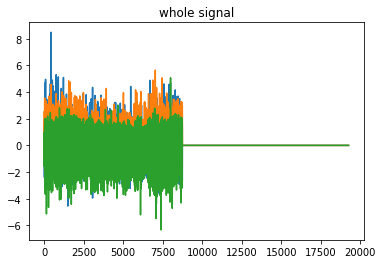

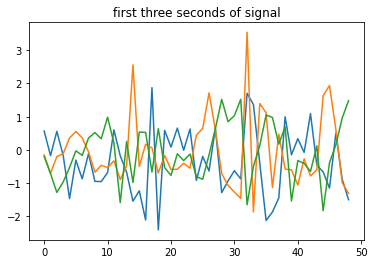

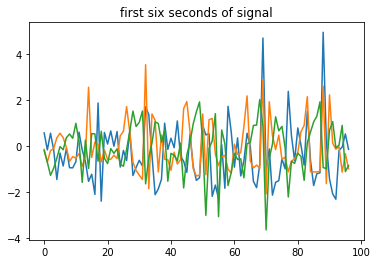

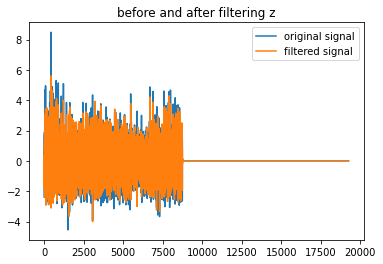

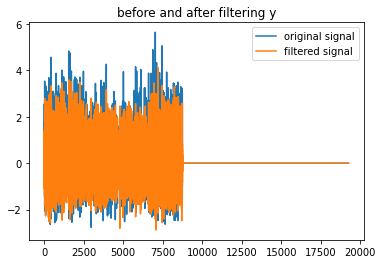

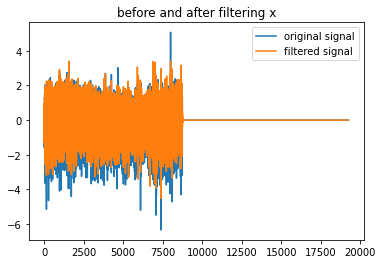

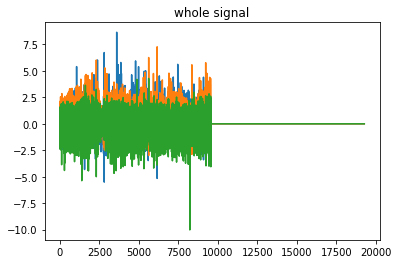

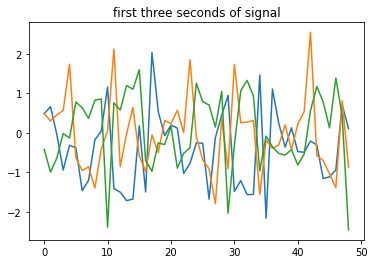

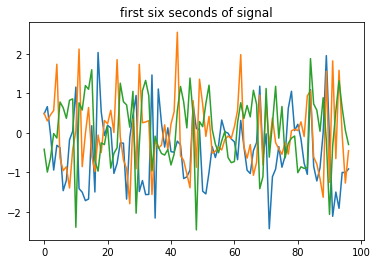

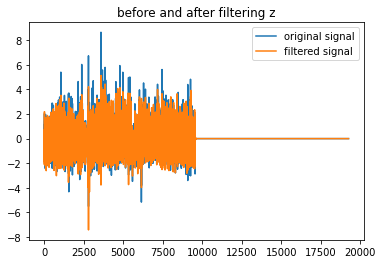

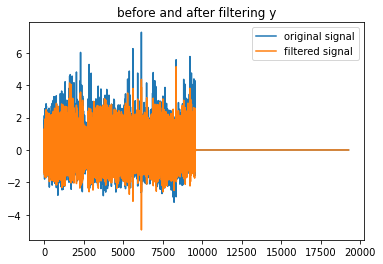

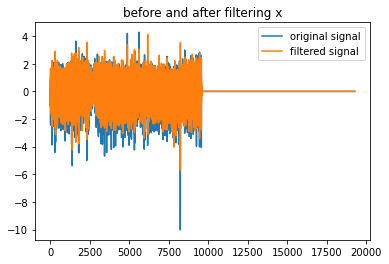

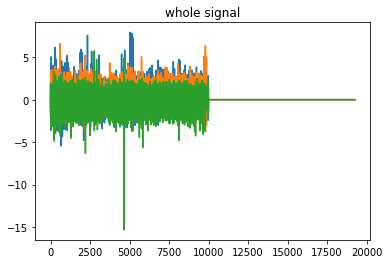

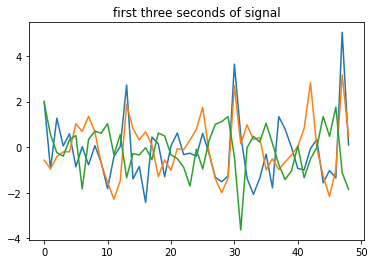

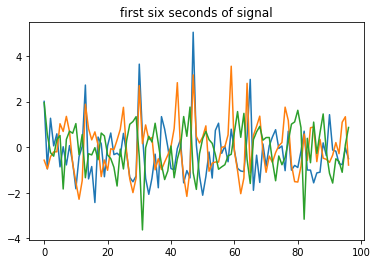

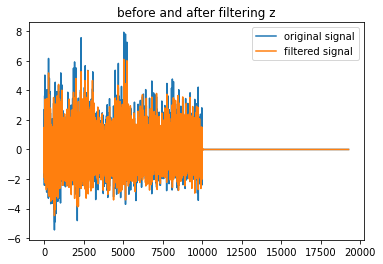

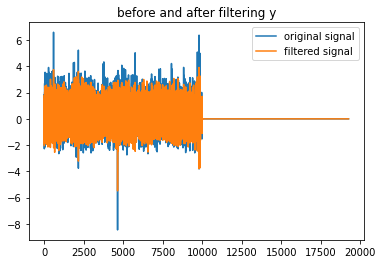

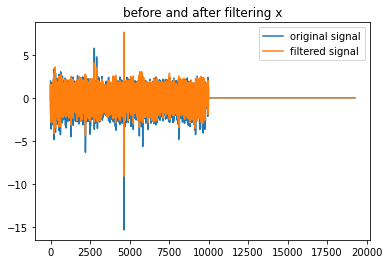

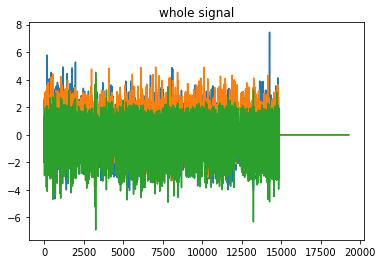

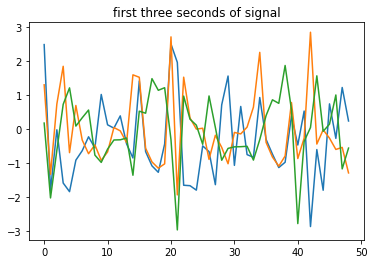

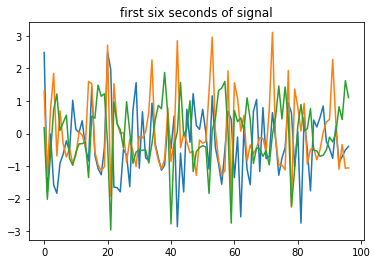

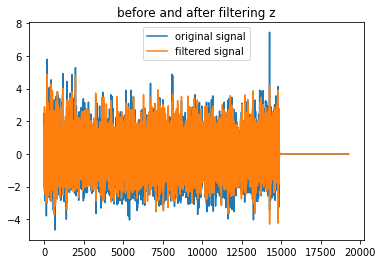

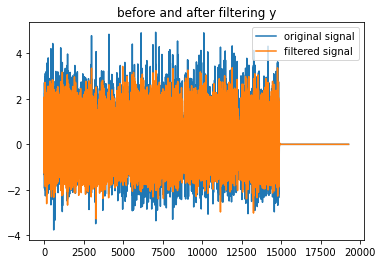

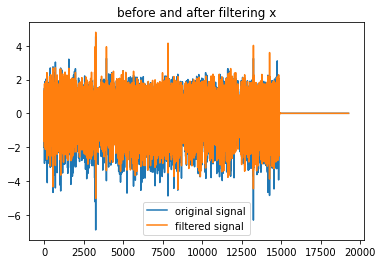

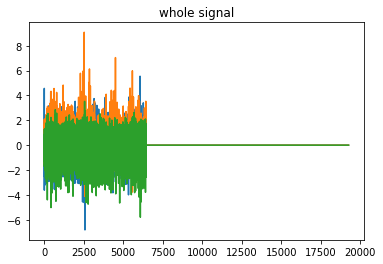

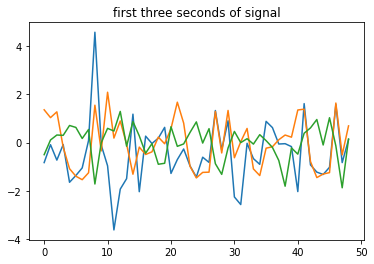

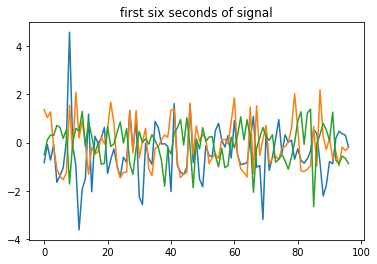

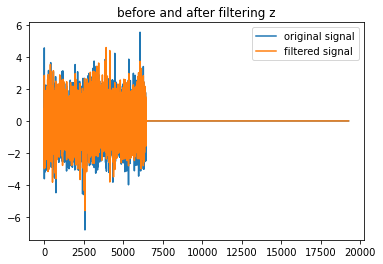

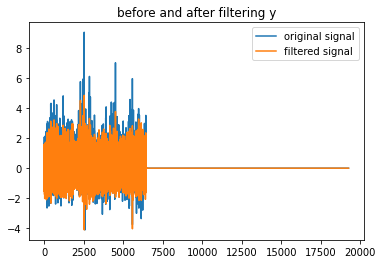

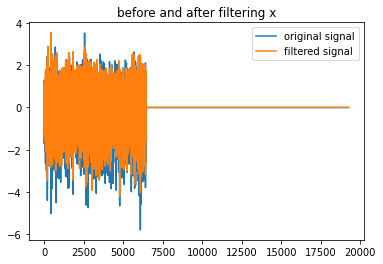

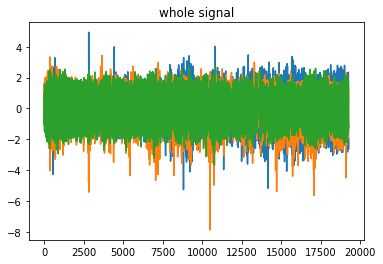

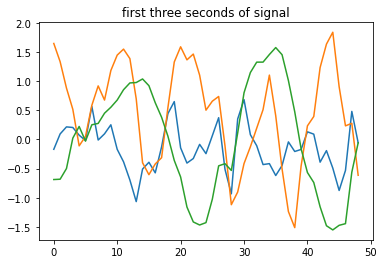

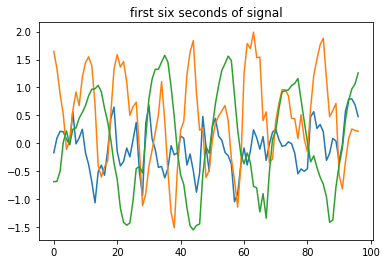

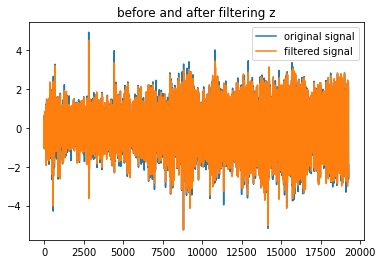

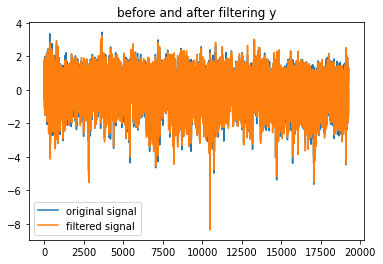

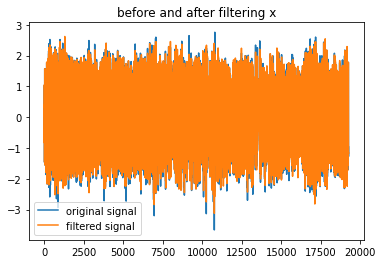

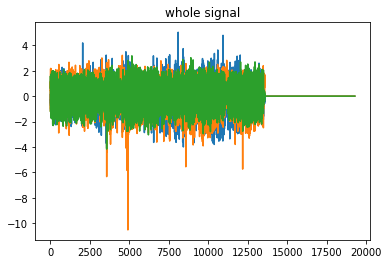

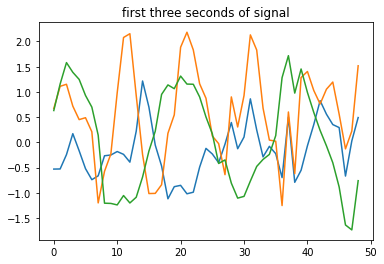

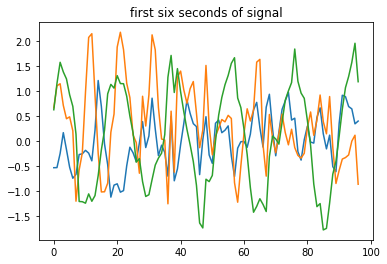

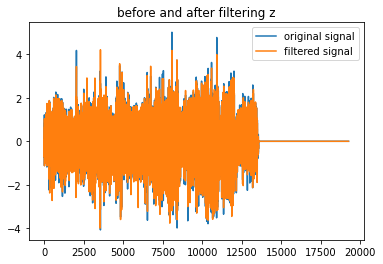

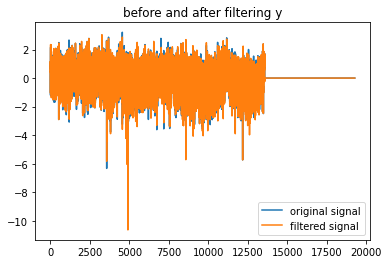

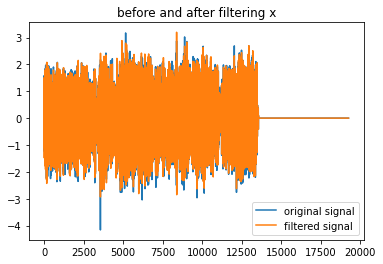

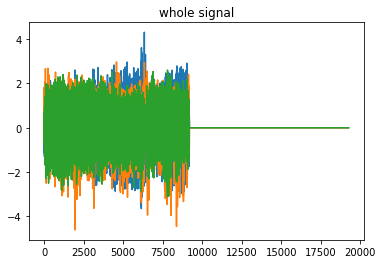

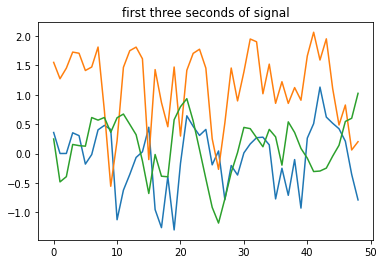

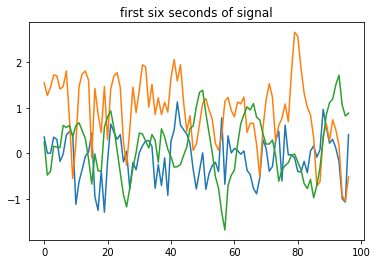

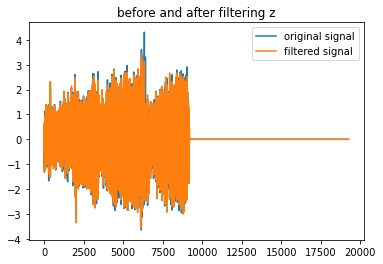

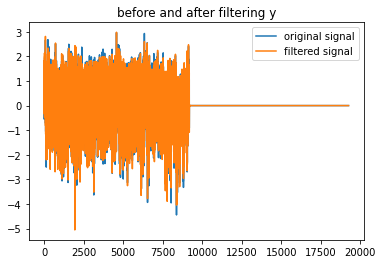

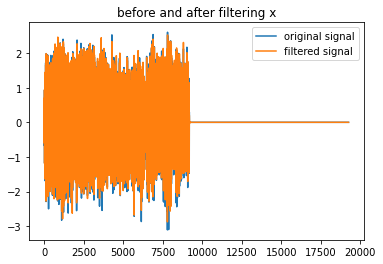

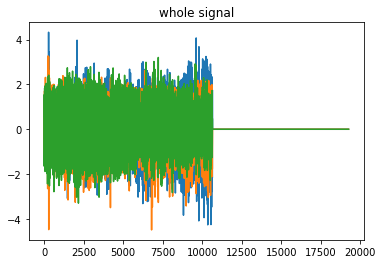

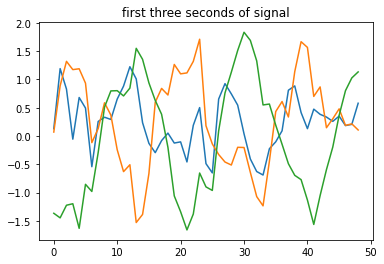

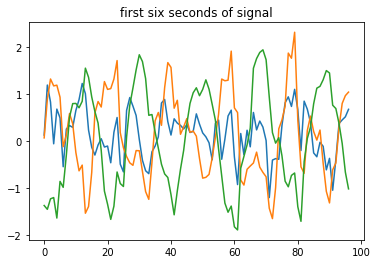

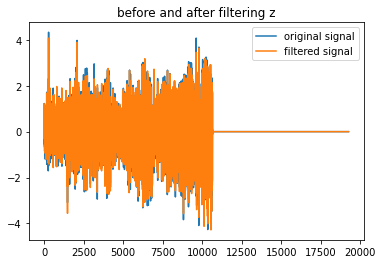

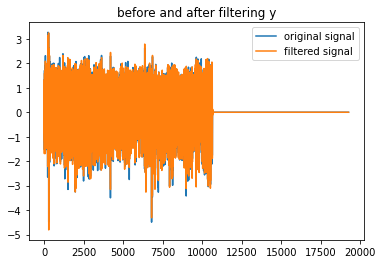

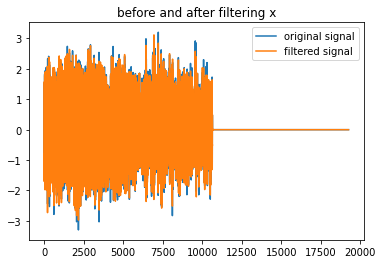

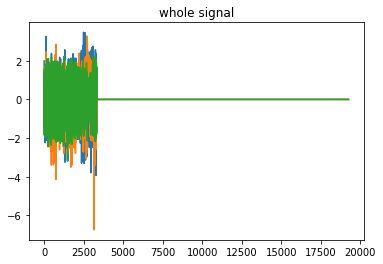

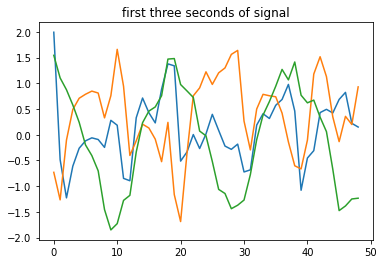

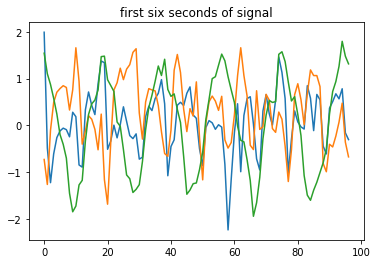

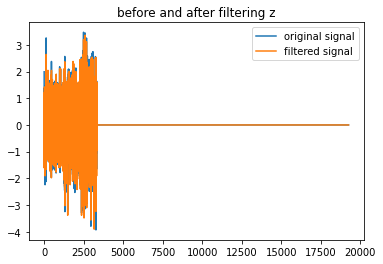

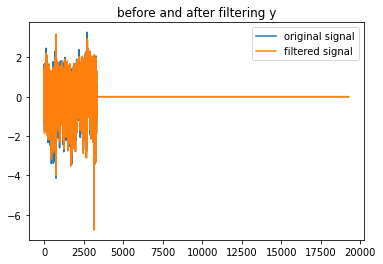

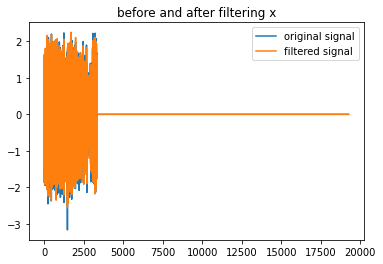

In [25]:
first_round = True
for file in glob.glob('raw_data/*/*/Accelerometer.csv'):
    
    label_name = file.split('/')[-3]
    label = label_dict[label_name]
    
    zyx_pd = pd.read_csv(file, header=0)
    
    position_second_one = p_sec# np.where(zyx_pd['seconds_elapsed'].to_numpy()>=1)[0][0]
    
    # Cut away the first and last five seconds of a signal:
    zyx_pd_cut = zyx_pd[position_second_one*5:(len(zyx_pd['z'].values)-position_second_one*5)]
    zyx_signal = zyx_pd_cut.to_numpy()[:,-3:]
    
    # nomalize_values:
    zyx_signal[:,0] = (zyx_signal[:,0] - zyx_signal[:,0].mean())/zyx_signal[:,0].std()
    zyx_signal[:,1] = (zyx_signal[:,1] - zyx_signal[:,1].mean())/zyx_signal[:,1].std()
    zyx_signal[:,2] = (zyx_signal[:,2] - zyx_signal[:,2].mean())/zyx_signal[:,2].std()

    
    diff_signal_length = max_length_signal - zyx_signal.shape[0]
    if diff_signal_length > 0:
        zyx_signal = np.concatenate((zyx_signal,np.zeros((diff_signal_length,3))),axis=0)

    simple_visualizer(zyx_signal, position_second_one)
    
    # filtering:
    filtered_signal_z, filtered_signal_y, filtered_signal_x = butter_filtering(zyx_signal)
    
    # cut the end away which doesn't build up a full window:
    filtered_signal_z_c = np.copy(filtered_signal_z)
    minus_ind = 0 
    
    while len(filtered_signal_z_c) % (position_second_one * 3) != 0:
        
        minus_ind -= 1
        filtered_signal_z_c = filtered_signal_z[:minus_ind]
    
    if minus_ind != 0:    

        filtered_signal_z, filtered_signal_y, filtered_signal_x = filtered_signal_z[:minus_ind], filtered_signal_y[:minus_ind], filtered_signal_x[:minus_ind]

    # normalize values:
   # filtered_signal_z = (filtered_signal_z - filtered_signal_z.mean())/filtered_signal_z.std()
    #filtered_signal_y = (filtered_signal_y - filtered_signal_y.mean())/filtered_signal_y.std()
    #filtered_signal_x = (filtered_signal_x - filtered_signal_x.mean())/filtered_signal_x.std()

    # time domain features:
    max_z, max_y, max_x, min_z, min_y, min_x, sum_z, sum_y, sum_x, abssum_z, abssum_y, abssum_x, std_z, std_y, std_x, euc_z, euc_y, euc_x, zcr_z, zcr_y, zcr_x, mean_z, mean_y, mean_x, absmean_z, absmean_y, absmean_x, skew_z, skew_y, skew_x, kurt_z, kurt_y, kurt_x, mag_mean, mag_var = time_feat_finder(filtered_signal_z, filtered_signal_y, filtered_signal_x, position_second_one)
    #store_array_file = np.array([label, max_z, max_y, max_x, min_z, min_y, min_x, sum_z, sum_y, sum_x, abssum_z, abssum_y, abssum_x, std_z, std_y, std_x, euc_z, euc_y, euc_x, zcr_z, zcr_y, zcr_x, mean_z, mean_y, mean_x, absmean_z, absmean_y, absmean_x, skew_z, skew_y, skew_x, kurt_z, kurt_y, kurt_x, mag_mean, mag_var]).reshape(1,-1)
    # KDA preparation:
    
    sample_windows_z = filtered_signal_z.reshape((position_second_one * 3,-1))
    sample_windows_y = filtered_signal_y.reshape((position_second_one * 3,-1))
    sample_windows_x = filtered_signal_x.reshape((position_second_one * 3,-1))
    
    # add label:
    sample_windows_z = np.concatenate((sample_windows_z, np.array([label]*sample_windows_z.shape[0]).reshape((-1,1))),axis=1)
    sample_windows_y = np.concatenate((sample_windows_y, np.array([label]*sample_windows_y.shape[0]).reshape((-1,1))),axis=1)
    sample_windows_x = np.concatenate((sample_windows_x, np.array([label]*sample_windows_x.shape[0]).reshape((-1,1))),axis=1)

    if first_round:
                
        max_z_collector = max_z
        max_y_collector = max_y
        max_x_collector = max_x
                                 
        min_z_collector = min_z
        min_y_collector = min_y
        min_x_collector = min_x
        
        sum_z_collector = sum_z
        sum_y_collector = sum_y
        sum_x_collector = sum_x        

        abssum_z_collector = abssum_z
        abssum_y_collector = abssum_y
        abssum_x_collector = abssum_x        

        std_z_collector = std_z
        std_y_collector = std_y
        std_x_collector = std_x        
 
        euc_z_collector = euc_z
        euc_y_collector = euc_y
        euc_x_collector = euc_x   
        
        zcr_z_collector = zcr_z
        zcr_y_collector = zcr_y
        zcr_x_collector = zcr_x   
               
        mean_z_collector = mean_z
        mean_y_collector = mean_y
        mean_x_collector = mean_x           
        
        absmean_z_collector = absmean_z
        absmean_y_collector = absmean_y
        absmean_x_collector = absmean_x           
        
        skew_z_collector = skew_z
        skew_y_collector = skew_y
        skew_x_collector = skew_x        

        kurt_z_collector = kurt_z
        kurt_y_collector = kurt_y
        kurt_x_collector = kurt_x   
        
        mag_mean_collector = mag_mean  
        mag_var_collector = mag_var  

        kda_collector_z = sample_windows_z
        kda_collector_y = sample_windows_y
        kda_collector_x = sample_windows_x        
                
        first_round = False
        
    else:
                
        max_z_collector = np.concatenate((max_z_collector, max_z),axis=1)
        max_y_collector = np.concatenate((max_y_collector, max_y),axis=1)
        max_x_collector = np.concatenate((max_x_collector, max_x),axis=1)

        min_z_collector = np.concatenate((min_z_collector, min_z),axis=1)
        min_y_collector = np.concatenate((min_y_collector, min_y),axis=1)
        min_x_collector = np.concatenate((min_x_collector, min_x),axis=1)
        
        sum_z_collector = np.concatenate((sum_z_collector, sum_z),axis=1)
        sum_y_collector = np.concatenate((sum_y_collector, sum_y),axis=1)
        sum_x_collector = np.concatenate((sum_x_collector, sum_x),axis=1)        
        
        abssum_z_collector = np.concatenate((abssum_z_collector, abssum_z),axis=1)
        abssum_y_collector = np.concatenate((abssum_y_collector, abssum_y),axis=1)
        abssum_x_collector = np.concatenate((abssum_x_collector, abssum_x),axis=1)   
        
        std_z_collector = np.concatenate((std_z_collector, std_z),axis=1)
        std_y_collector = np.concatenate((std_y_collector, std_y),axis=1)
        std_x_collector = np.concatenate((std_x_collector, std_x),axis=1)    
        
        euc_z_collector = np.concatenate((euc_z_collector, euc_z),axis=1)
        euc_y_collector = np.concatenate((euc_y_collector, euc_y),axis=1)
        euc_x_collector = np.concatenate((euc_x_collector, euc_x),axis=1)   
        
        zcr_z_collector = np.concatenate((zcr_z_collector, zcr_z),axis=1)
        zcr_y_collector = np.concatenate((zcr_y_collector, zcr_y),axis=1)
        zcr_x_collector = np.concatenate((zcr_x_collector, zcr_x),axis=1)           
  
        mean_z_collector = np.concatenate((mean_z_collector, mean_z),axis=1)
        mean_y_collector = np.concatenate((mean_y_collector, mean_y),axis=1)
        mean_x_collector = np.concatenate((mean_x_collector, mean_x),axis=1)     

        absmean_z_collector = np.concatenate((absmean_z_collector, absmean_z),axis=1)
        absmean_y_collector = np.concatenate((absmean_y_collector, absmean_y),axis=1)
        absmean_x_collector = np.concatenate((absmean_x_collector, absmean_x),axis=1)     
        
        skew_z_collector = np.concatenate((skew_z_collector, skew_z),axis=1)
        skew_y_collector = np.concatenate((skew_y_collector, skew_y),axis=1)
        skew_x_collector = np.concatenate((skew_x_collector, skew_x),axis=1)          
        
        kurt_z_collector = np.concatenate((kurt_z_collector, kurt_z),axis=1)
        kurt_y_collector = np.concatenate((kurt_y_collector, kurt_y),axis=1)
        kurt_x_collector = np.concatenate((kurt_x_collector, kurt_x),axis=1)       

        mag_mean_collector = np.concatenate((mag_mean_collector, mag_mean),axis=1) 
        mag_var_collector = np.concatenate((mag_var_collector, mag_var),axis=1) 

        kda_collector_z = np.concatenate((kda_collector_z, sample_windows_z),axis=0)
        kda_collector_y = np.concatenate((kda_collector_y, sample_windows_y),axis=0)
        kda_collector_x = np.concatenate((kda_collector_x, sample_windows_x),axis=0)

# for KDA the determinator isn't allowed to be 0, therefore:
kda_collector_z[np.where(abs(kda_collector_z)<1e-6)] = 1e-6
kda_collector_y[np.where(abs(kda_collector_y)<1e-6)] = 1e-6
kda_collector_x[np.where(abs(kda_collector_x)<1e-6)] = 1e-6

kda_fun_z = dml.kda.KDA()
result_kda_z_ = kda_fun_z.fit_transform(X=kda_collector_z[:,:-1],y=kda_collector_z[:,-1]) # X with ALL y labels 

kda_fun_y = dml.kda.KDA()
result_kda_y_ = kda_fun_y.fit_transform(X=kda_collector_y[:,:-1],y=kda_collector_y[:,-1])

kda_fun_x = dml.kda.KDA()
result_kda_x_ = kda_fun_x.fit_transform(X=kda_collector_x[:,:-1],y=kda_collector_x[:,-1]) 


In [29]:
for curr_window_ind, (kda_sample_z, kda_sample_y, kda_sample_x) in enumerate(zip(kda_collector_z,kda_collector_y,kda_collector_x)):    
    
    X_z = kda_sample_z[:-1].reshape((1,-1))
    X_y = kda_sample_y[:-1].reshape((1,-1))
    X_x = kda_sample_x[:-1].reshape((1,-1))


    if (abs(X_z[0]) > 1e-6).any() and (abs(X_y[0]) > 1e-6).any() and (abs(X_x[0]) > 1e-6).any():
        #print('XXXX', X_z[0])
        label_z = kda_sample_z[-1]
        kda_result_sample_z = kda_fun_z.transform(X_z)

        label_y = kda_sample_y[-1]
        kda_result_sample_y = kda_fun_y.transform(X_y)

        label_x = kda_sample_x[-1]
        kda_result_sample_x = kda_fun_x.transform(X_x)
        
        max_z_sample = max_z_collector[0, curr_window_ind]
        max_y_sample = max_y_collector[0, curr_window_ind]
        max_x_sample = max_x_collector[0, curr_window_ind]

        min_z_sample = min_z_collector[0, curr_window_ind]
        min_y_sample = min_y_collector[0, curr_window_ind]
        min_x_sample = min_x_collector[0, curr_window_ind]

        sum_z_sample = sum_z_collector[0, curr_window_ind]
        sum_y_sample = sum_y_collector[0, curr_window_ind]
        sum_x_sample = sum_x_collector[0, curr_window_ind]

        abssum_z_sample = abssum_z_collector[0, curr_window_ind]
        abssum_y_sample = abssum_y_collector[0, curr_window_ind]
        abssum_x_sample = abssum_x_collector[0, curr_window_ind]

        std_z_sample = std_z_collector[0, curr_window_ind]
        std_y_sample = std_y_collector[0, curr_window_ind]
        std_x_sample = std_x_collector[0, curr_window_ind]
        
        var_z_sample = std_z_collector[0, curr_window_ind]**2
        var_y_sample = std_y_collector[0, curr_window_ind]**2
        var_x_sample = std_x_collector[0, curr_window_ind]**2

        euc_z_sample = euc_z_collector[0, curr_window_ind]
        euc_y_sample = euc_y_collector[0, curr_window_ind]
        euc_x_sample = euc_x_collector[0, curr_window_ind]

        zcr_z_sample = zcr_z_collector[0, curr_window_ind]
        zcr_y_sample = zcr_y_collector[0, curr_window_ind]
        zcr_x_sample = zcr_x_collector[0, curr_window_ind]

        mean_z_sample = mean_z_collector[0, curr_window_ind]
        mean_y_sample = mean_y_collector[0, curr_window_ind]
        mean_x_sample = mean_x_collector[0, curr_window_ind]

        absmean_z_sample = absmean_z_collector[0, curr_window_ind]
        absmean_y_sample = absmean_y_collector[0, curr_window_ind]
        absmean_x_sample = absmean_x_collector[0, curr_window_ind]
        '''
        skew_z_sample = skew_z_collector[0, curr_window_ind]
        if np.isnan(skew_z_sample):
            skew_z_sample = 0.0
        skew_y_sample = skew_y_collector[0, curr_window_ind]
        if np.isnan(skew_y_sample):
            skew_y_sample = 0.0
        skew_x_sample = skew_x_collector[0, curr_window_ind]
        if np.isnan(skew_x_sample):
            skew_x_sample = 0.0

        kurt_z_sample = kurt_z_collector[0, curr_window_ind]
        if np.isnan(kurt_z_sample):
            kurt_z_sample = 0.0
        kurt_y_sample = kurt_y_collector[0, curr_window_ind]
        if np.isnan(kurt_y_sample):
            kurt_y_sample = 0.0
        kurt_x_sample = kurt_x_collector[0, curr_window_ind]
        if np.isnan(kurt_x_sample):
            kurt_x_sample = 0.0
        '''
        mag_mean_sample = mag_mean_collector[0, curr_window_ind]
        mag_var_sample = mag_var_collector[0, curr_window_ind]

        kda_z0 = np.copy(kda_result_sample_z[:,0])
        kda_z1 = np.copy(kda_result_sample_z[:,1])
        kda_z2 = np.copy(kda_result_sample_z[:,2])

        kda_y0 = np.copy(kda_result_sample_y[:,0])
        kda_y1 = np.copy(kda_result_sample_y[:,1])
        kda_y2 = np.copy(kda_result_sample_y[:,2])

        kda_x0 = np.copy(kda_result_sample_x[:,0])
        kda_x1 = np.copy(kda_result_sample_x[:,1])
        kda_x2 = np.copy(kda_result_sample_x[:,2])

        arff_saver(kda_result_sample_z[:,0][0], kda_result_sample_z[:,1][0], kda_result_sample_z[:,2][0], kda_result_sample_y[:,0][0], kda_result_sample_y[:,1][0], kda_result_sample_y[:,2][0], kda_result_sample_x[:,0][0], kda_result_sample_x[:,1][0], kda_result_sample_x[:,2][0], max_z_sample, max_y_sample, max_x_sample, min_z_sample, min_y_sample, min_x_sample, sum_z_sample, sum_y_sample, sum_x_sample, abssum_z_sample, abssum_y_sample, abssum_x_sample, std_z_sample, std_y_sample, std_x_sample, var_z_sample, var_y_sample, var_x_sample, euc_z_sample, euc_y_sample, euc_x_sample, zcr_z_sample, zcr_y_sample, zcr_x_sample, mean_z_sample, mean_y_sample, mean_x_sample, absmean_z_sample, absmean_y_sample, absmean_x_sample, mag_mean_sample, mag_var_sample, int(label_z))
